In [1]:
import pandas as pd
import numpy as np
import os
import scipy as sp
from scipy import ndimage
import matplotlib.pyplot as plt
import PIL
import cv2

In [113]:
pil_image = PIL.Image

In [3]:
train_imgs = os.listdir('dog_kaggle/train/train')

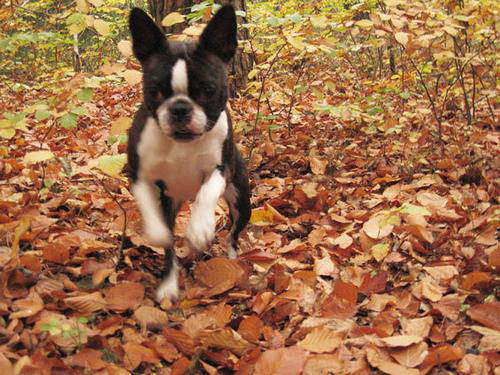

In [4]:
pil_image.open("dog_kaggle/train/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [3]:
if not os.path.exists('kag_dog_resized'):
    os.makedirs('kag_dog_resized')

In [137]:
def image_resize(filepath, width, height, destination_folder):
    for file in os.listdir(filepath):
        open_ = pil_image.open(f'{filepath}/{file}')
        image_resized = open_.resize((width, height), pil_image.NEAREST)
        image_resized.save(f'{destination_folder}/{file}')

In [2]:
train_path = ("dog_kaggle/train/train")
test_path = ("dog_kaggle/test/test")
destination = (r"./kag_dog_resized")

In [138]:
image_resize(train_path, 299, 299, destination )

In [3]:
path = "./redownload_images_resized"

In [4]:
all_images = []

for image in os.listdir(path):
    img = plt.imread(f"{path}/{image}")
    img = img/255
    all_images.append(img)

In [5]:
all_images = np.array(all_images)

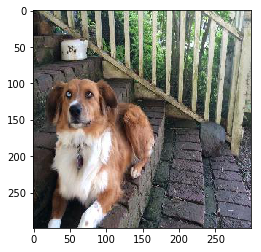

In [6]:
plt.imshow(all_images[0])

In [7]:
all_images.shape

(2067, 299, 299, 3)

In [12]:
#image_resize(test_path, 299, 299, destination)

In [3]:
all_images = []
remaining = []

for image in os.listdir('./kag_dog_resized'):
    with open(f"{destination}/{image}", mode = 'rb') as image:
        img = ndimage.imread(image, mode = 'RGB')
        try:
            all_images.append(img)
        except:
            pass
            try:
                remaining.append(img)
            except:
                pass
            
        

c:\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


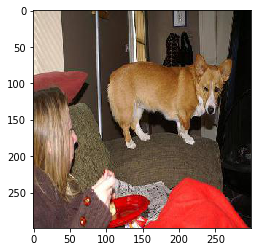

In [7]:
plt.imshow(all_images[10000])

In [4]:
all_images = np.array(all_images)/255

In [5]:
len(os.listdir(('./kag_dog_resized')))

10222

In [6]:
ids = os.listdir(destination)

In [7]:
clean_jpg = []

for id_ in ids:
    new = id_.replace('.jpg', '')
    clean_jpg.append(new)

In [8]:
clean_jpg[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [40]:
df = pd.read_csv("C:/Users/stephen/datascience/udacity/project4/dog_kaggle/all (2)/labels.csv")

In [41]:
df.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [42]:
breed_id, breed_name = pd.factorize(df.breed)
df['breed_id'] = breed_id

In [43]:
df.head(25)

id                    breed  breed_id
0   000bec180eb18c7604dcecc8fe0dba07              boston_bull         0
1   001513dfcb2ffafc82cccf4d8bbaba97                    dingo         1
2   001cdf01b096e06d78e9e5112d419397                 pekinese         2
3   00214f311d5d2247d5dfe4fe24b2303d                 bluetick         3
4   0021f9ceb3235effd7fcde7f7538ed62         golden_retriever         4
5   002211c81b498ef88e1b40b9abf84e1d       bedlington_terrier         5
6   00290d3e1fdd27226ba27a8ce248ce85       bedlington_terrier         5
7   002a283a315af96eaea0e28e7163b21b                   borzoi         6
8   003df8b8a8b05244b1d920bb6cf451f9                  basenji         7
9   0042188c895a2f14ef64a918ed9c7b64       scottish_deerhound         8
10  004396df1acd0f1247b740ca2b14616e        shetland_sheepdog         9
11  0067dc3eab0b3c3ef0439477624d85d6             walker_hound        10
12  00693b8bc2470375cc744a6391d397ec              maltese_dog        11
13  006cc3ddb9dc1bd827479569fcdc52dc                 bluetick         3
14  0075dc49dab4024d12fafe67074d8a81          norfolk_terrier        12
15  00792e341f3c6eb33663e415d0715370      african_hunting_dog        13
16  007b5a16db9d9ff9d7ad39982703e429  wire-haired_fox_terrier        14
17  007b8a07882822475a4ce6581e70b1f8                  redbone        15
18  007ff9a78eba2aebb558afea3a51c469         lakeland_terrier        16
19  008887054b18ba3c7601792b6a453cc3                    boxer        17
20  008b1271ed1addaccf93783b39deab45                 doberman        18
21  008ba178d6dfc1a583617470d19c1673               otterhound        19
22  009509be3ca7cce0ff9e37c8b09b1125               otterhound        19
23  0097c6242c6f3071762d9f85c3ef1b2f       bedlington_terrier         5
24  00a338a92e4e7bf543340dc849230e75                    dingo         1

In [44]:
breed_id_dict = {id_: breed for id_, breed in list(zip(df.id.values, df.breed_id.values))}

In [45]:
new_df = pd.DataFrame(clean_jpg, columns = ['id'])

NameError: name 'clean_jpg' is not defined

In [15]:
new_df['label'] = new_df['id'].map(breed_id_dict)

In [16]:
new_df.head(20)

id  label
0   000bec180eb18c7604dcecc8fe0dba07      0
1   001513dfcb2ffafc82cccf4d8bbaba97      1
2   001cdf01b096e06d78e9e5112d419397      2
3   00214f311d5d2247d5dfe4fe24b2303d      3
4   0021f9ceb3235effd7fcde7f7538ed62      4
5   002211c81b498ef88e1b40b9abf84e1d      5
6   00290d3e1fdd27226ba27a8ce248ce85      5
7   002a283a315af96eaea0e28e7163b21b      6
8   003df8b8a8b05244b1d920bb6cf451f9      7
9   0042188c895a2f14ef64a918ed9c7b64      8
10  004396df1acd0f1247b740ca2b14616e      9
11  0067dc3eab0b3c3ef0439477624d85d6     10
12  00693b8bc2470375cc744a6391d397ec     11
13  006cc3ddb9dc1bd827479569fcdc52dc      3
14  0075dc49dab4024d12fafe67074d8a81     12
15  00792e341f3c6eb33663e415d0715370     13
16  007b5a16db9d9ff9d7ad39982703e429     14
17  007b8a07882822475a4ce6581e70b1f8     15
18  007ff9a78eba2aebb558afea3a51c469     16
19  008887054b18ba3c7601792b6a453cc3     17

In [17]:
x_train = all_images[:10060]
y_train = new_df.label.values[:10060]
x_test = all_images[10060:]
y_test = new_df.label.values[10060:]

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

KeyboardInterrupt: 

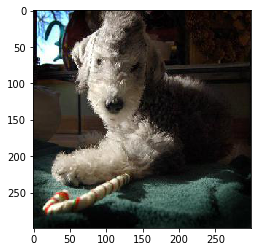

In [25]:
plt.imshow(all_images[6])

In [9]:
import tensorflow as tf

In [10]:
TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "inception")
#INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")
INCEPTION_V3_CHECKPOINT_PATH = 'C:\\Users\stephen\datascience\datasets\inception\inception_v3.ckpt'

def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    os.makedirs(path, exist_ok=True)
    tgz_path = os.path.join(path, "inception_v3.tgz")
    urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
    inception_tgz = tarfile.open(tgz_path)
    inception_tgz.extractall(path=path)
    inception_tgz.close()
    os.remove(tgz_path)

In [11]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    with open(os.path.join("C:/Users/stephen/datascience/oreilly/handson-ml-master/datasets/inception", "imagenet_class_names.txt"), "rb") as f:
        content = f.read().decode("utf-8")
        return CLASS_NAME_REGEX.findall(content)

In [12]:
class_names = ["no dog"] + load_class_names()

In [13]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="X")
training = tf.placeholder_with_default(False, shape=[])
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X, num_classes=1001, is_training=training)

inception_saver = tf.train.Saver()

In [14]:
predictions = end_points["Predictions"]
saver = tf.train.Saver()

In [15]:
def shuffle_batch(X,y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [121]:
logits = []

with tf.Session() as sess:
    inception_saver.restore(sess, 'C:\\Users\stephen\datascience\datasets\inception\inception_v3.ckpt')
    for batch in shuffle_batch(all_images, 4):
    #predictions_val = predictions.eval(feed_dict  = {X: test_images})
        logits_pred = sess.run(logits, feed_dict = {X: batch})
        logits.append(logits_pred)

INFO:tensorflow:Restoring parameters from C:\Users\stephen\datascience\datasets\inception\inception_v3.ckpt


TypeError: shuffle_batch() missing 1 required positional argument: 'batch_size'

In [16]:
end_points

{'Conv2d_1a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_3a_3x3/MaxPool:0' shape=(?, 73, 73, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu:0' shape=(?, 73, 73, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu:0' shape=(?, 71, 71, 192) dtype=float32>,
 'MaxPool_5a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_5a_3x3/MaxPool:0' shape=(?, 35, 35, 192) dtype=float32>,
 'Mixed_5b': <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5b/concat:0' shape=(?, 35, 35, 256) dtype=float32>,
 'Mixed_5c': <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5c/concat:0' shape=(?,

In [17]:
prelogits = tf.squeeze(end_points['PreLogits'], axis = [1,2])

In [18]:
prelogits.shape

TensorShape([Dimension(None), Dimension(2048)])

In [19]:
df.breed.nunique()

NameError: name 'df' is not defined

In [20]:
n_outputs = 120

with tf.name_scope('new_output_layer'):
    breed_logits = tf.layers.dense(prelogits, n_outputs, name = 'breed_logits')
    y_proba = tf.nn.softmax(breed_logits, name = 'y_proba')

In [21]:
y = tf.placeholder(tf.int32, shape=None)

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits = breed_logits, labels = y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    breed_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope = 'breed_logits')
    training_op = optimizer.minimize(loss, var_list = breed_vars)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(breed_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [22]:
[v.name for v in breed_vars]

['breed_logits/kernel:0', 'breed_logits/bias:0']

In [159]:
n_epochs = 4
batch_size = 32
y_preds = []

n_iterations_per_epoch = len(x_train) // batch_size

with tf.Session() as sess:
    init.run()
    inception_saver.restore(sess,INCEPTION_V3_CHECKPOINT_PATH )
    top_score = 0
    lower_scores = []
    for epoch in range(n_epochs):
            for x_batch, y_batch in shuffle_batch(x_train, y_train, batch_size):
                sess.run(training_op, feed_dict = {X: x_batch, y:y_batch, training: True})
                acc_train = accuracy.eval(feed_dict={X: x_batch, y: y_batch})
                val_acc = accuracy.eval(feed_dict = {training: False, X: x_test, y: y_test})
                print("epoch: ", epoch, "  Train accuracy:", acc_train)
                print("val acc = ", val_acc)
                if val_acc > top_score:
                    top_score = val_acc
                    save_path = saver.save(sess, "./dog_breed_inception.ckpt")
                    lower_scores = []
                    y_preds = []
                    predictions = sess.run(breed_logits, feed_dict = {X: x_test})
                    y_preds.append(predictions)
                elif val_acc < top_score:
                    lower_scores.append(val_acc)
                    if len(lower_scores) == 12:
                        break
                
    

INFO:tensorflow:Restoring parameters from C:\Users\stephen\datascience\datasets\inception\inception_v3.ckpt
epoch:  0   Train accuracy: 0.121212125
val acc =  0.012345679
epoch:  0   Train accuracy: 0.060606062
val acc =  0.018518519
epoch:  0   Train accuracy: 0.030303031
val acc =  0.012345679
epoch:  0   Train accuracy: 0.030303031
val acc =  0.012345679
epoch:  0   Train accuracy: 0.0
val acc =  0.012345679
epoch:  0   Train accuracy: 0.030303031
val acc =  0.018518519
epoch:  0   Train accuracy: 0.030303031
val acc =  0.030864198
epoch:  0   Train accuracy: 0.030303031
val acc =  0.030864198
epoch:  0   Train accuracy: 0.121212125
val acc =  0.06790123
epoch:  0   Train accuracy: 0.09090909
val acc =  0.06790123
epoch:  0   Train accuracy: 0.21212122
val acc =  0.08024691
epoch:  0   Train accuracy: 0.121212125
val acc =  0.086419754
epoch:  0   Train accuracy: 0.0
val acc =  0.086419754
epoch:  0   Train accuracy: 0.15625
val acc =  0.09876543
epoch:  0   Train accuracy: 0.125
va

epoch:  2   Train accuracy: 0.8181818
val acc =  0.7777778
epoch:  2   Train accuracy: 0.72727275
val acc =  0.79012346
epoch:  2   Train accuracy: 0.8181818
val acc =  0.7962963
epoch:  2   Train accuracy: 0.8181818
val acc =  0.7962963
epoch:  2   Train accuracy: 0.75757575
val acc =  0.80246913
epoch:  2   Train accuracy: 0.8787879
val acc =  0.80864197
epoch:  2   Train accuracy: 0.84375
val acc =  0.8148148
epoch:  2   Train accuracy: 0.78125
val acc =  0.8148148
epoch:  2   Train accuracy: 0.71875
val acc =  0.8148148
epoch:  2   Train accuracy: 0.96875
val acc =  0.80864197
epoch:  2   Train accuracy: 0.8125
val acc =  0.8148148
epoch:  2   Train accuracy: 0.875
val acc =  0.8148148
epoch:  2   Train accuracy: 0.875
val acc =  0.8148148
epoch:  2   Train accuracy: 0.9375
val acc =  0.82098764
epoch:  2   Train accuracy: 0.84375
val acc =  0.8271605
epoch:  2   Train accuracy: 0.78125
val acc =  0.8271605
epoch:  2   Train accuracy: 0.84375
val acc =  0.82098764
epoch:  2   Train

In [160]:
top_score

0.83950615

In [163]:
np.argmax(y_preds, axis = 2)

array([[ 59,  64,  10,  12,  61,  14,   3,  62,  27,  41,   4,  82, 102,
         29, 108,  83,  13,  34, 119, 102,  64,  34,  54,  41,  45,  71,
         59, 115,  19,  26, 108,  30,  28,  92,  89,  65,  79,   7,  77,
         92,  44,  95,  85,  19,  87,  22,  76,  97, 110,  37,  86,  98,
         96,  37,  38,  71,  37,  74,  27,  86,  67,  61,   0, 110,  76,
         47, 116, 113,  35,  41,  41,  99,  71, 111,  83,  61,  28,  58,
         17,  39,  21, 116,  57,  54,  63,  45,  18,  76, 114,  64,  60,
         32,  62,  47,  67,  14,  93, 104,   8, 115,  26,  90,  99,  73,
         19,  90,  17,  65,  22,  77,  60,  99,   4,  42,  66, 110,  40,
         34,  67,  49,  93,  88,  25,  77,  47,  68,  93,  42,  87,  12,
         27, 112,  33, 119,  97,   7,  17,  24,   4,  99,  11,   5, 100,
        115,  11, 117,  79,   7,  10,  28, 109,  45,  34,  87,  91,  63,
         94,   6,  97,  63,  77,  92]], dtype=int64)

In [164]:
y_test

array([ 59,  64,  87,  12,  61,  14,   3,  62,  27,  41,  25,  82, 102,
        29, 108, 106,  13,  69, 119, 102,  64,  34,  40,  41,  45,  99,
        59, 115,  19,  26, 108,  30,  28,  92,  25,  65,  79,  26,  81,
        92,  44,  95,  85,  19,  87,  22,  76,  97, 110,  37,  68,  98,
        47,  37,  38,  99,  37,  90,  27,  86,  67,  61,   0, 110,  76,
        47, 116, 113,  35,  41,  41,  99,  71, 111, 106,  61,  28,  58,
        86,  35,  21, 116,  57,  54,  63,  45,  18,  76, 114,  64,  60,
        32,  62,  47,  67,  14,  93, 104,   8, 115,  26, 116,  26,  73,
        19,  90,  17,  65,  22,  77,  60,  71,   4,  42,  66, 110,  40,
        34,  67,  49,  69,  88,  25,  77,  47,  86,  93,  42,  87,  12,
        27, 112,  33,  46,  97,   7,  17,  24,   4,  99,  11,   5, 100,
        24,  11, 117,  79,   7,  87,  28, 109,  45,  34,  87,  91,  63,
        48,   6,  93,  63,  77,  92], dtype=int64)

In [126]:
all_images = all_images.reshape(-1, 299, 299, 3)

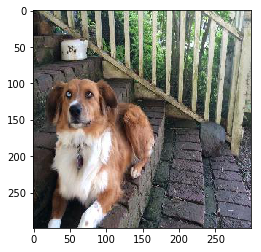

In [127]:
plt.imshow(all_images[0])

In [35]:
np. 

Object `np.perumutation` not found.


In [161]:
def feeder(images):
    
    batch_size = 16
    y = 0
    
    for x in range(len(images)//batch_size):
        try:
            batch = images[:batch_size]
            yield batch
            y = batch_size
            batch_size = batch_size * 2
        except:
            pass
            batch = images[batch_size:1+batch_size]
    

In [ ]:
store = []

with tf.Session() as sess:
    saver.restore(sess, "./dog_breed_inception.ckpt")
    for image in feeder(all_images):
        restore_pred = sess.run(breed_logits, feed_dict = {X: image})
        store.append(restore_pred)

INFO:tensorflow:Restoring parameters from ./dog_breed_inception.ckpt


In [1]:
new_pred = np.argmax(store, axis = 2)

NameError: name 'np' is not defined

In [139]:
new_pred.shape


(2067, 1)

In [8]:
df = pd.read_csv("./final_df.csv")

In [34]:
df.shape

(2068, 29)

In [31]:
df[df.jpg_url.duplicated() == True]

tweet_id  favorites  retweets  \
1297  752309394570878976          0     18071   
1314  754874841593970688          0      8690   
1332  757729163776290825          0      8792   
1344  759159934323924993          0      1264   
1348  759566828574212096          0     22940   
1363  761371037149827077          0     19510   
1367  761750502866649088          0      4284   
1386  766078092750233600          0      2829   
1406  770093767776997377          0      3313   
1416  771171053431250945          0      8254   
1426  772615324260794368          0      3684   
1445  775898661951791106          0     17980   
1452  776819012571455488          0     15064   
1455  777641927919427584          0      4656   
1462  778396591732486144          0     13426   
1475  780496263422808064          0      4075   
1486  782021823840026624          0      6856   
1494  783347506784731136          0      6158   
1509  786036967502913536          0      7779   
1521  788070120937619456          0      3774   
1537  790723298204217344          0      2557   
1540  791026214425268224          0      4542   
1563  793614319594401792          0      3442   
1568  794355576146903043          0     11359   
1570  794983741416415232          0      3720   
1578  796177847564038144          0     15810   
1587  798340744599797760          0      3714   
1588  798628517273620480          0      2167   
1589  798644042770751489          0      2041   
1590  798665375516884993          0      4290   
...                  ...        ...       ...   
1592  798694562394996736          0      5478   
1593  798697898615730177          0      7191   
1600  799774291445383169          0      5168   
1604  800443802682937345          0      4766   
1617  802624713319034886          0      3232   
1622  803692223237865472          0      8195   
1625  804413760345620481          0      3554   
1632  805958939288408065          0      5929   
1634  806242860592926720          0     12902   
1638  807059379405148160          0      8081   
1643  808134635716833280          0      6564   
1650  809808892968534016          0      5404   
1681  813944609378369540          0      3519   
1691  816014286006976512          0      5838   
1697  816829038950027264          0      5182   
1701  817181837579653120          0      9333   
1710  818588835076603904          0      6734   
1715  819015331746349057          0     20728   
1716  819015337530290176          0     40214   
1725  820446719150292993          0      2831   
1734  821813639212650496          0      3652   
1740  822647212903690241          0      7014   
1744  823269594223824897          0     10763   
1753  824796380199809024          0      5996   
1787  829878982036299777          0      5448   
1801  832040443403784192          0     10541   
1802  832215726631055365          0     10168   
1855  841833993020538882          0     16419   
1899  851953902622658560          0     10127   
2035  885311592912609280          0     18273   

                                                jpg_url  img_num  \
1297  https://pbs.twimg.com/ext_tw_video_thumb/67535...        1   
1314    https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg        1   
1332    https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg        2   
1344    https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg        1   
1348    https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg        1   
1363  https://pbs.twimg.com/tweet_video_thumb/CeBym7...        1   
1367    https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg        1   
1386    https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg        1   
1406    https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg        1   
1416    https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg        3   
1426    https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg        1   
1445    https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg        1   
1452    https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg        3   
1455    https://pbs.twimg

In [33]:
df.jpg_url.nunique()

2007

In [141]:
df = df[:-1]

In [142]:
mapped = pd.Series(new_pred.ravel()).map(breed_dict)

In [143]:
breed_dict = {id_: name for id_, name in list(zip(breed_id, list(breed_name)))}

In [144]:
len(str(new_pred.ravel()[2]))

1

In [145]:
mapped

0                  toy_terrier
1                        boxer
2                irish_terrier
3              norwich_terrier
4                        dhole
5                          NaN
6                irish_terrier
7                          NaN
8                     leonberg
9                        dhole
10                         NaN
11                         NaN
12             norwich_terrier
13               irish_terrier
14                         NaN
15        old_english_sheepdog
16                newfoundland
17                         NaN
18                         NaN
19                         NaN
20             norwich_terrier
21                    pekinese
22                         NaN
23                         NaN
24                    pekinese
25                         NaN
26               irish_terrier
27                       dhole
28                         NaN
29      welsh_springer_spaniel
                 ...          
2037                       NaN
2038    

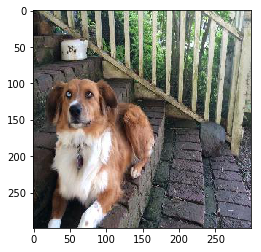

In [148]:
plt.imshow(all_images[0])

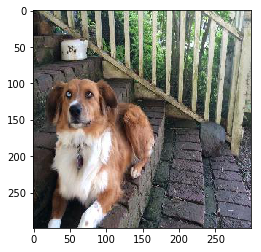

In [155]:
plt.imshow(all_images[0].reshape(299, 299, 3))

In [104]:
breed_name

Index(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog',
       ...
       'blenheim_spaniel', 'silky_terrier', 'sussex_spaniel',
       'german_short-haired_pointer', 'french_bulldog', 'bouvier_des_flandres',
       'tibetan_mastiff', 'english_springer', 'cocker_spaniel', 'rottweiler'],
      dtype='object', length=120)

In [107]:
df['inception_pred'] = new_pred.ravel()


In [108]:
df['inception_pred'] = df['inception_pred'].map(breed_dict)

In [109]:
df.head()

tweet_id  favorites  retweets  \
0  666020888022790149       2541       507   
1  666029285002620928        129        47   
2  666033412701032449        125        44   
3  666044226329800704        296       139   
4  666049248165822465        108        41   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
3  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
4  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   

                       p1  p1_confidence  p1_dog                  p2  \
0  welsh_springer_spaniel       0.465074    True              collie   
1                 redbone       0.506826    True  miniature_pinscher   
2         german_shepherd       0.596461    True            malinois   
3     rhodesian_ridgeback       0.408143    True             redbone   
4      miniature_pinscher       0.560311    True          rottweiler   

   p2_confidence       ...         retweeted_status_user_id  \
0       0.156665       ...                             None   
1       0.074192       ...                             None   
2       0.138584       ...                             None   
3       0.360687       ...                             None   
4       0.243682       ...                             None   

  retweeted_status_timestamp  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        NaN   
4                        NaN   

                                       expanded_urls  name  doggo floofer  \
0  https://twitter.com/dog_rates/status/666020888...  None  False   False   
1  https://twitter.com/dog_rates/status/666029285...  None  False   False   
2  https://twitter.com/dog_rates/status/666033412...  None  False   False   
3  https://twitter.com/dog_rates/status/666044226...  None  False   False   
4  https://twitter.com/dog_rates/status/666049248...  None  False   False   

  pupper  puppo rating   inception_pred  
0  False  False   8/10      toy_terrier  
1  False  False   7/10            boxer  
2  False  False   9/10    irish_terrier  
3  False  False   6/10  norwich_terrier  
4  False  False   5/10            dhole  

[5 rows x 30 columns]

In [169]:
from sklearn.metrics import accuracy_score

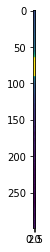

In [112]:
plt.imshow(image[1])

In [172]:
new_pred

array([[ 59,  64,  10,  12,  61,  14,   3,  62,  27,  41,   4,  82, 102,
         29, 108,  83,  13,  34, 119, 102,  64,  34,  54,  41,  45,  71,
         59, 115,  19,  26, 108,  30,  28,  92,  89,  65,  79,   7,  77,
         92,  44,  95,  85,  19,  87,  22,  76,  97, 110,  37,  86,  98,
         96,  37,  38,  71,  37,  74,  27,  86,  67,  61,   0, 110,  76,
         47, 116, 113,  35,  41,  41,  99,  71, 111,  83,  61,  28,  58,
         17,  39,  21, 116,  57,  54,  63,  45,  18,  76, 114,  64,  60,
         32,  62,  47,  67,  14,  93, 104,   8, 115,  26,  90,  99,  73,
         19,  90,  17,  65,  22,  77,  60,  99,   4,  42,  66, 110,  40,
         34,  67,  49,  93,  88,  25,  77,  47,  68,  93,  42,  87,  12,
         27, 112,  33, 119,  97,   7,  17,  24,   4,  99,  11,   5, 100,
        115,  11, 117,  79,   7,  10,  28, 109,  45,  34,  87,  91,  63,
         94,   6,  97,  63,  77,  92]], dtype=int64)

In [179]:
proj_imgs = []

for image in os.listdir('./dog_kaggle/dog_images_resized'):
    i = plt.imread(f'./dog_kaggle/dog_images_resized/{image}')
    proj_imgs.append(i)
    

In [182]:
proj_imgs = np.array(proj_imgs)

In [184]:
proj_imgs = proj_imgs/255

In [185]:
store = []

with tf.Session() as sess:
    saver.restore(sess, "./dog_breed_inception.ckpt")
    restore_pred = sess.run(breed_logits, feed_dict = {X: proj_imgs})
    store.append(restore_pred)

INFO:tensorflow:Restoring parameters from ./dog_breed_inception.ckpt


In [186]:
np.argmax(store, axis = 2)

array([[ 58,   2, 101,  94,  57, 101,  58,  58,  36,  94,  86,  74,  74,
         58, 101,  86, 109,  58,  94,  36,  99,  74,  92,  71, 105,  86,
         58,  58,  94, 109,  94,   4,   4,  94,  17,  89,  83,  94,  41,
         36,  43,  65,  58,  27,  90,  74, 101,  85,  58, 101,  77,  23,
         58,  58, 101,  90,  94,  94, 109,  90,  99,  58,  94, 100,  99,
         99,  56, 101,  32,  99,  58, 101,  10,  58,  60,  94,  23,  36,
         96,  58,  92,  58, 101,  74,  94,  58,  58,  92,  17,  58,  94,
         34,   8,  52,  74, 101,  83, 101, 101,  94,  74,  12, 103,  36,
         36,  94,  17,  58, 101,  58,   5, 101,  58,  77,  74,  57, 115,
         58, 115,  86, 101,  86, 100,  92,  99,  58, 107,  86,  86,  74,
         58,  90,  17, 101,  58, 101,  58,  92,   4,  23,  39,  58,  92,
         44,  94,  58,  58,  94,  23,  65,  90, 101,  58,  25, 101, 112,
         33,  57,  58,  86, 101, 106,  71,  62, 115,  83,  58, 101, 101,
        101, 103,  25,  58,  94,  77,  99,  58, 100

In [188]:
class_names

['no dog',
 'tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree f

In [66]:
store = []

with tf.Session() as sess:
    saver.restore(sess, "./dog_breed_inception.ckpt")
    restore_pred = sess.run(breed_logits, feed_dict = {X: luna.reshape(-1,299, 299, 3)})
    store.append(restore_pred)

INFO:tensorflow:Restoring parameters from ./dog_breed_inception.ckpt


In [67]:
np.argmax(store, axis = 2)

array([[114]], dtype=int64)

In [68]:
breed_name[114]

'french_bulldog'

In [50]:
plt.imshow(tino)

NameError: name 'tino' is not defined

In [125]:
'malti-poo' in breed_name

False

In [128]:
for i in sorted(breed_name):
    print(i)

affenpinscher
afghan_hound
african_hunting_dog
airedale
american_staffordshire_terrier
appenzeller
australian_terrier
basenji
basset
beagle
bedlington_terrier
bernese_mountain_dog
black-and-tan_coonhound
blenheim_spaniel
bloodhound
bluetick
border_collie
border_terrier
borzoi
boston_bull
bouvier_des_flandres
boxer
brabancon_griffon
briard
brittany_spaniel
bull_mastiff
cairn
cardigan
chesapeake_bay_retriever
chihuahua
chow
clumber
cocker_spaniel
collie
curly-coated_retriever
dandie_dinmont
dhole
dingo
doberman
english_foxhound
english_setter
english_springer
entlebucher
eskimo_dog
flat-coated_retriever
french_bulldog
german_shepherd
german_short-haired_pointer
giant_schnauzer
golden_retriever
gordon_setter
great_dane
great_pyrenees
greater_swiss_mountain_dog
groenendael
ibizan_hound
irish_setter
irish_terrier
irish_water_spaniel
irish_wolfhound
italian_greyhound
japanese_spaniel
keeshond
kelpie
kerry_blue_terrier
komondor
kuvasz
labrador_retriever
lakeland_terrier
leonberg
lhasa
malamut